# Stats - number of days with surplus biomass

$$
z_{surplus} =
\frac{1}{30} \displaystyle\sum_{y=1}^{30} \left(
\begin{cases}
0 & \quad x = 0 \\
1 & \quad x > 0
\end{cases} \right)
$$

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)
# pasture areas for clipping prior to calculating stats
pastures = gpd.read_file(
    os.path.join("data", "landcover", "clc-2018-pasture.gpkg"),
    layer="dissolved",
)["geometry"]

In [5]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [4]:
ds_ec_count = cplt.duration_surplus_biomass(ds_ec, skipna=True)

In [5]:
cplt.describe_dataset(ds_ec_count, pastures)

,bm_c
count,237600.000000
mean,267.670913
std,49.607770
min,0.000000
25%,241.000000
50%,258.000000
75%,285.000000
max,361.000000


In [6]:
cplt.describe_dataset(ds_ec_count, pastures, exp=True)

exp           historical         rcp45         rcp85
bm_c count  79200.000000  79200.000000  79200.000000
     mean     264.080492    267.271692    271.660556
     std       50.207642     49.535216     48.778497
     min        0.000000      0.000000      0.000000
     25%      236.000000    242.000000    247.000000
     50%      253.000000    257.000000    263.000000
     75%      284.000000    284.000000    288.000000
     max      359.000000    361.000000    360.000000

In [8]:
ds_ec_count

<xarray.Dataset> Size: 7MB
Dimensions:       (model: 4, exp: 3, year: 60, rlat: 33, rlon: 37)
Coordinates:
  * rlat          (rlat) float64 264B 3.685 3.795 3.905 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 296B -17.27 -17.16 -17.05 ... -13.41 -13.3
  * exp           (exp) <U10 120B 'historical' 'rcp45' 'rcp85'
  * model         (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
  * year          (year) int64 480B 1976 1977 1978 1979 ... 2067 2068 2069 2070
    lat           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    lon           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    height        float64 8B 2.0
    rotated_pole  |S1 1B b''
    spatial_ref   int64 8B 0
Data variables:
    bm_c          (model, exp, year, rlat, rlon) float64 7MB dask.array<chunksize=(1, 2, 1, 33, 37), meta=np.ndarray>

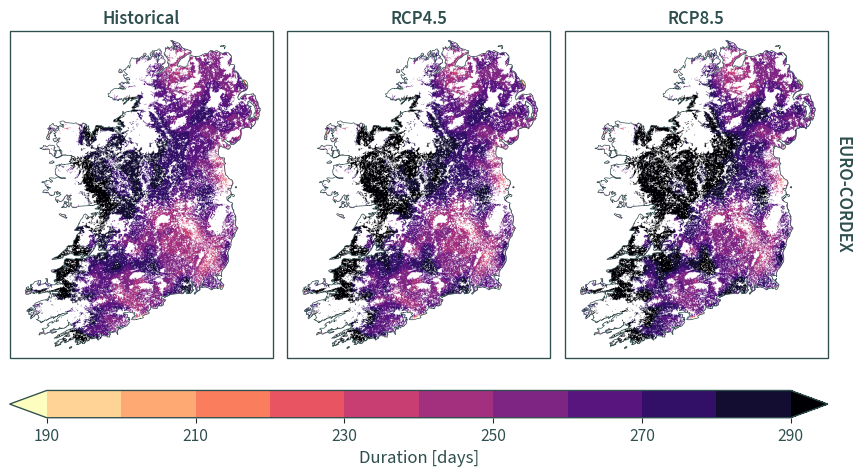

In [18]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm_c"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(190, 290 + 10, 10)
)

## HiResIreland

In [10]:
ds_hr = cplt.load_all_data("HiResIreland")

In [11]:
ds_hr_count, ds_hr_val = cplt.calc_event_duration(ds_hr, variable="bm", skipna=True)

In [12]:
cplt.describe_dataset(ds_hr_count, pastures)

,bm
count,1.960920e+06
mean,2.282306e+02
std,4.086689e+01
min,0.000000e+00
25%,2.060000e+02
50%,2.220000e+02
75%,2.460000e+02
max,3.660000e+02


In [13]:
cplt.describe_dataset(ds_hr_count, pastures, exp=True)

exp          historical          rcp45          rcp85
bm count  653640.000000  653640.000000  653640.000000
   mean      217.111098     230.714952     236.865804
   std        39.107700      41.319271      39.613579
   min         0.000000       0.000000       0.000000
   25%       198.000000     208.000000     215.000000
   50%       212.000000     223.000000     233.000000
   75%       229.000000     248.000000     258.000000
   max       366.000000     366.000000     366.000000

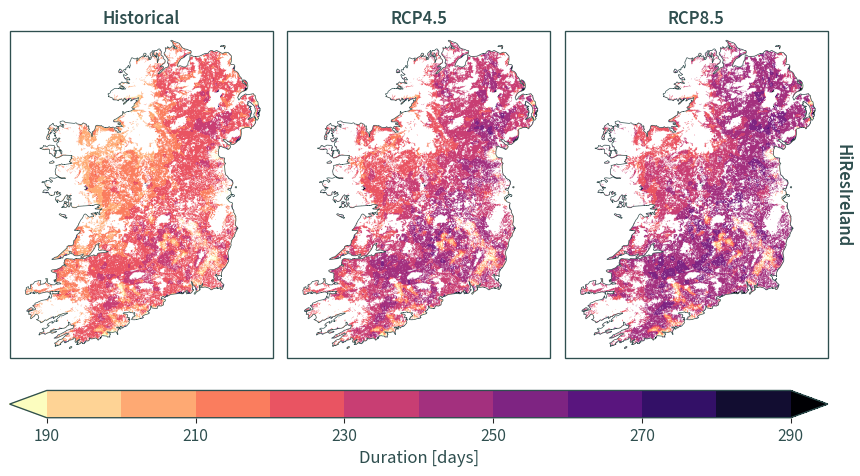

In [19]:
cplt.plot_stats(ds_hr_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="both", row="data",
    levels=np.arange(190, 290 + 10, 10)
)